 # I.	Problem statement
    
   Singular value decomposition (SVD) and Eigendecomposition are 2 popular methods of matrix decomposition, which reduces a matrix to lower-rank matrices to simplify more complex operations. Eigendecomposition decomposes a square matrix into a set of eigen values and eigen vectors. Eigenvectos and eigenvalues is important because they describe long-term behavior of the system. On the other hand, Singular value decomposition decomposes the matrix into singular values and singular vectors similar to Eigendecomposition, but SVD also works on non-square matrices which makes it more generally applicable.
    
   Eigendecomposition and SVD both have many important applications in the field of machine learning and data science, especially in dimensionality reduction to provide the fundamental characteristics of the data. Some real-life applications of SVD include image processing, data reduction, and recommendation systems; while eigendecomposition is important for spectral clustering as well as page-rank algorithms, etc.

   Some programming language provides built-in software packages to calculate the SVD and Eigendecomposition. For example, Python has `numpy.linalg`, `scipy.decomp_svd`, `sklearn.decomposition` libraries which svd function for SVD and `eig` for eigendecomposition. Since users can blindly apply these functions to decompose a matrix into eigenvalues and eigenvectors or singular values and singular vectors, many don’t really understand the steps it takes to compute the output from the input, and as the result apply the functions wrongly, misinterpret the output or fail to modify the function for more specific needs.  

   The motivation of this project is to understand how to calculate SVD as this will reinforce the fundamental understanding of linear algebra and linear transformation such as matrix stretching and rotating. Moreover, this will provide fundamental knowledge of other important concepts in machine learning such as principal component analysis (PCA), natural language processing, and computer vision etc.

# II. Introduction to Singular Value Decomposition (SVD)

   Singular Value Decomposition is a method in linear algebra to decompose a matrix (A) into 3 other matrices: $A = USV^T$. SVD performs several transformations of Matrix A: rotate the matrix by transposed of V, apply scale factor S, rotate the matrix by U. Unlike Eigendecomposition, SVD can work on non-square and sparse matrices.
   * A: `m x n` matrix to decompose
   * U: `m x m` or `m x k` [unitary matrix](https://en.wikipedia.org/wiki/Unitary_matrix), columns of U are left singular vectors of A
   * S: `m x n` matrix of s non-negative values on diagonal axis, s values of diagonal of Sigma are the **singular values** of A
   * VT: `n x n` or `k x n` transposed of a [unitary matrix](https://en.wikipedia.org/wiki/Unitary_matrix), columns of V are singular vectors of A
           

In [1]:
import numpy as np
from numpy import array
import numpy.linalg as linalg
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
from numpy.linalg import norm
from random import normalvariate
from math import sqrt

In [2]:
# A simple illustration of SVD using scipy.linalg
M = array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0],[0,2,0,0,0]])
print(M)
# SVD
U, S, V = svd(M)
print('U',U)
print('S',S)
print('V',V)

[[1 0 0 0 2]
 [0 0 3 0 0]
 [0 0 0 0 0]
 [0 2 0 0 0]]
U [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
S [3.         2.23606798 2.         0.        ]
V [[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


## 1. SVD math modelling

**Power Iteration algorithm**

Given a matrix `A`, compute the SVD of the matrix

* Step 1: Compute $A^T$, $A^TA$

* Step 2: Calculate Eigenvalues and Singular values of $A^TA$ and sort them in descending order
    * Calculate f(c) = $A^TA$ - $cI$ = 0
    * Solve f(c) for eigenvalues -> $sqrt(eigenvalues)$ for singular values
    
* Step 3: Construct diagonal matrix **S** by placing singular values in descending order along itsdiagonal. Compute its inverse, $S^-1$

* Step 4: Use the ordered eigenvalues from step 2 and compute the eigenvectors of ATA. Place these eigenvectors along the columns of **V** and compute its transpose, $V^T$

* Step 5. Compute **U** as U = $AVS^I$. 

* Step 6: Compute the full SVD using A = $USV^T$ to complete the proof
    

In [3]:
# this function will be completed in the next phase of the project
def manual_svd(A, epsilon=1e-10):
    # should return U, S, V matrices
    pass
    

## 2.  Application of SVD
   * Dimensionality reduction: Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem.
   * Recommendation System: SVD is used in collaborative approach of Recommendation System
   * Image Compression: reduces size of image to an acceptable level of quality to save memory and disk space
   * etc.
   
### 2.1. SVD in Recommendation System
There are 2 Popular Approaches for Recommendation System. 
* Collaborative Filtering: assuming that users who have liked an item in the past will probably like a similar item in the future, this approach investigates past interaction between users and items to identify the similarity of items.  
* Content-based Filtering: identifies characteristics of items to recommend similar items. This approach is more suitable when there're available data about items but not enough data about users' preference

**SVD is used in Collaborative Filtering Approach**

In [4]:
# SVD in Movie Rating Dataset using Collaborative Filtering Approach
import numpy as np
import pandas as pd
ratings = pd.io.parsers.read_csv('ml-1m/ratings.dat', 
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')

movies = pd.io.parsers.read_csv('ml-1m/movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::')

print("**Ratings**")
print(ratings.head(1))
print("**Movies**")
print(movies.head(1))

**Ratings**
   user_id  movie_id  rating       time
0        1      1193       5  978300760
**Movies**
   movie_id             title                        genre
0         1  Toy Story (1995)  Animation|Children's|Comedy


In [5]:
# ratings matrix with moview as rows and users as columns, 
# this matrix will be a sparse matrix with a lot of 0s as not all users rate a movie
ratings_mat = np.ndarray(
    shape=(np.max(ratings.movie_id.values), np.max(ratings.user_id.values)),
    dtype=np.uint8)
ratings_mat[ratings.movie_id.values-1, ratings.user_id.values-1] = ratings.rating.values
print(ratings_mat.shape)
# Normalize matrix by substracting mean
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

print(ratings_mat[0])
print(normalised_mat[0])

(3952, 6040)
[5 0 0 ... 0 0 3]
[ 3.57400662 -1.42599338 -1.42599338 ... -1.42599338 -1.42599338
  1.57400662]


> In the next phase of the project, I will apply the manually calculated SVD instead of using the built-in Python function

In [6]:
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)
print('U shape', U.shape)
print('S shape', S.shape)
print('V shape', V.shape)
print('Singular Values:', S)

U shape (6040, 6040)
S shape (3952,)
V shape (3952, 3952)
Singular Values: [2.06617808e+01 1.06804930e+01 9.14055972e+00 ... 1.71271486e-15
 1.71271486e-15 3.59421921e-16]


In [7]:
#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the ratingsset
    movie_row = data[index, :]
    # calculate the Einstein sum of 2 matrices -> return output of a 1-D matrix called magnitude
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data)) 
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Function to print top N similar movies
def print_similar_movies(movies, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movies[movies.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movies[movies.movie_id == id].title.values[0])

#k-principal components to represent movies, movie_id to find recommendations, top_n print n results        
k = 50
movie_id = 1 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative ratings with number of movies (rows) and k columns
indexes = top_cosine_similarity(sliced, movie_id, top_n)

#Printing the top N similar movies
print_similar_movies(movies, movie_id, indexes)

Recommendations for Toy Story (1995): 

Toy Story (1995)
Toy Story 2 (1999)
Babe (1995)
Bug's Life, A (1998)
Pleasantville (1998)
Babe: Pig in the City (1998)
Aladdin (1992)
Stuart Little (1999)
Secret Garden, The (1993)
Tarzan (1999)


<ipython-input-7-7bf16548ebf8>:7: RuntimeWarning: invalid value encountered in true_divide
  similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)


### 2.2 SVD in image compression

In [8]:
vmin = 0
vmax = 1
image_bias = 1 # sometimes 1
def plot_svd(A):
    n = len(A)
    imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()
    U, S, V = svd(A) # this will be changed to the manually calculated SVD in later phase of the project

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)
        
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=80)
    plt.show()
    
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U,S,V

> In the next phase of the project, I will apply the manually calculated SVD instead of using the built-in Python function

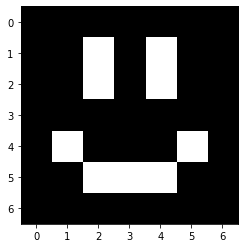

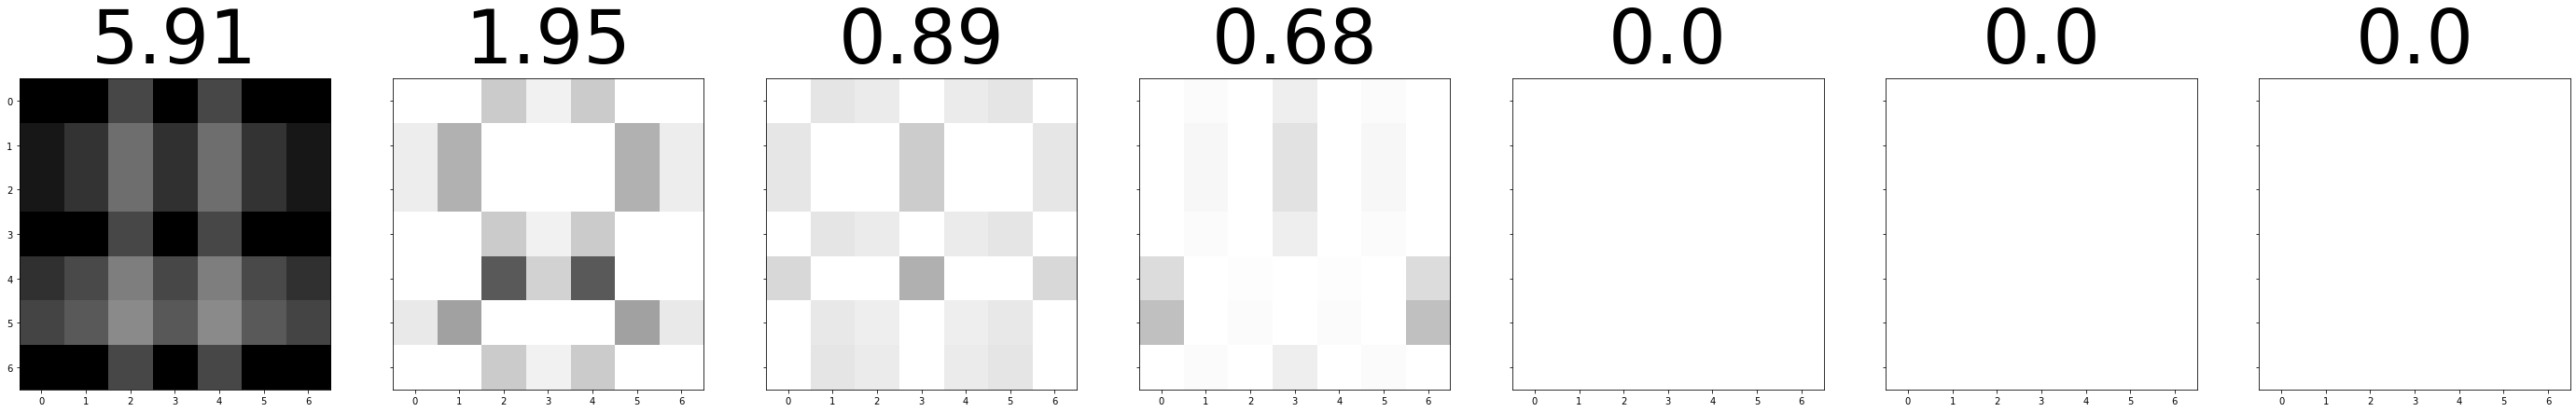

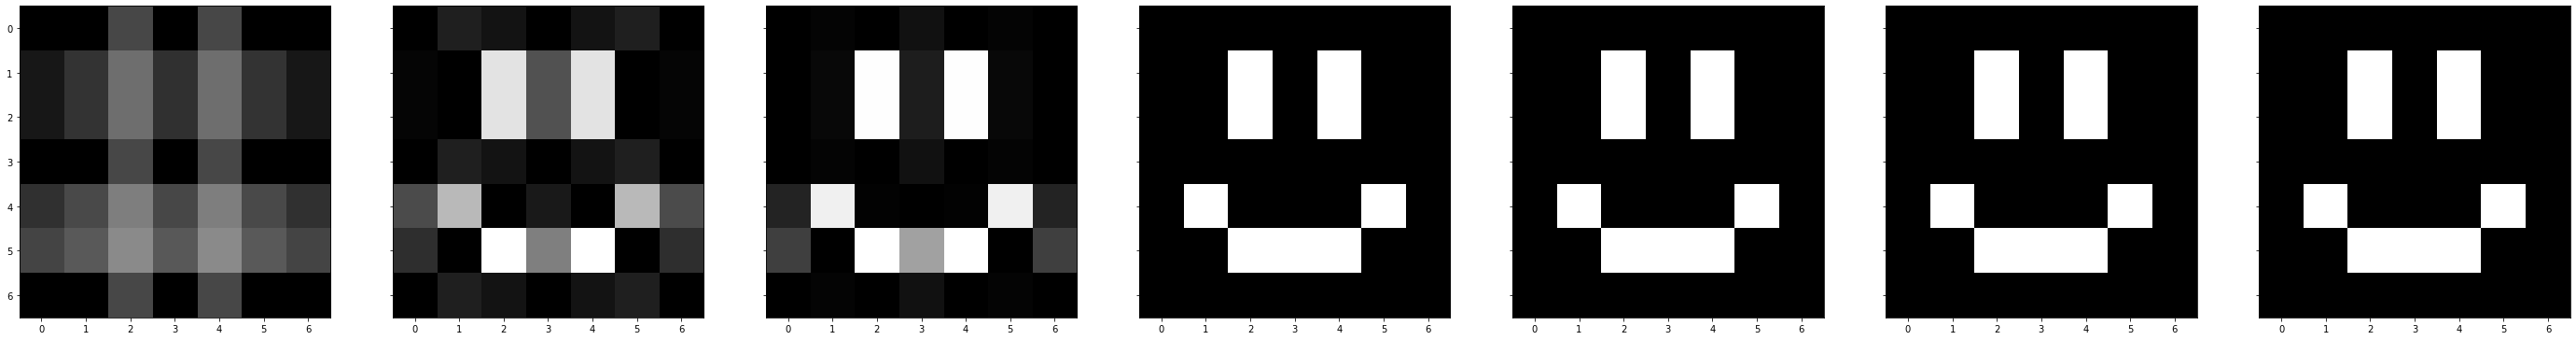

In [9]:
D = np.array([[1,1,1,1,1,1,1],
              [1,1,0,1,0,1,1],
              [1,1,0,1,0,1,1],
              [1,1,1,1,1,1,1],
              [1,0,1,1,1,0,1],
              [1,1,0,0,0,1,1],
              [1,1,1,1,1,1,1],
             ])
U,S,V = plot_svd(D)

# Reference
1.	[Gentle Introduction to Eigenvalues and Eigenvectors for Machine Learning]( https://machinelearningmastery.com/introduction-to-eigendecomposition-eigenvalues-and-eigenvectors/) 
2.	[Real life examples for eigenvalues / eigenvectors](https://math.stackexchange.com/questions/1520832/real-life-examples-for-eigenvalues-eigenvectors) 
3.	[Eigenvalues and eigenvectors (MIT open courseware)](https://www.youtube.com/watch?v=cdZnhQjJu4I)
4.	[Eigenvalues and eigenvectors (3Blue1Brown)](https://www.youtube.com/watch?v=PFDu9oVAE-g)
5.	[Singular Value Decomposition (SVD) and Image Compression (Luis Serrano)](https://www.youtube.com/watch?v=DG7YTlGnCEo) 
6.	[Master Dimensionality Reduction with these 5 Must-Know Applications of Singular Value Decomposition (SVD) in Data Science (Analytics Vidhya)](https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/) 
7.	[10 Powerful Applications of Linear Algebra in Data Science (with Multiple Resources)](https://www.analyticsvidhya.com/blog/2019/07/10-applications-linear-algebra-data-science/?utm_source=blog&utm_medium=5-applications-singular-value-decomposition-svd-data-science)
8. [SVD in Movie Recommendation System](https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/)
9. [Convert image to Matrix](https://www.youtube.com/watch?v=mAMTXJJQBDI)
10. [Backward and Forward Error Analysis](https://www.math.usm.edu/lambers/mat460/fall09/lecture6.pdf)
11. [Calculate SVD tutorial](https://cs.fit.edu/~dmitra/SciComp/Resources/singular-value-decomposition-fast-track-tutorial.pdf)
12. [SVD theorem proof](https://jeremykun.com/2016/05/16/singular-value-decomposition-part-2-theorem-proof-algorithm/)
13. [Simple SVD](https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2)
14. [SVD by CMU](https://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/book-chapter-4.pdf)
15. [Deep Learning Book Series · 2.8 Singular Value Decomposition - Hadrien Jean Ph.D](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/)
